# Обработка данных для машинного обучения

### Задания для выполнения
1) На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

2) В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

3) Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

    - исследование шкалы измерения каждого существенного признака;
    
    - построение эмпирического распределения каждого существенного признака;

    - анализ количества и распределения отсутствующих значений;

    - построение совместного распределения каждого признака и целевой переменной;

    - построение корреляционной матрицы.

4) По каждому пункту анализа необходимо сделать содержательный вывод.

5) Провести подготовительную обработку данных, включающую следующие шаги: 6. удаление или заполнение отсутствующих значений; 7. приведение всех признаков к бинарной либо числовой шкале; 8. удаление несущественных либо избыточных признаков; 9. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

6) Количественные характеристики датасета необходимо также привести после его обработки.

### прогнозирования сердечной недостаточности
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Age: Возраст: возраст пациента [лет]

Sex: Пол: пол пациента [M: Мужчина, F: Женщина]

ChestPainType: Тип боли в груди: тип боли в груди [TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомная]

*RestingBP: * АД в состоянии покоя: артериальное давление в состоянии покоя [мм рт. ст.]

Cholesterol: Холестерин: сывороточный холестерин [мм/дл]

FastingBS: Уровень сахара в крови натощак: уровень сахара в крови натощак [1: если уровень сахара в крови натощак > 120 мг/дл, 0: в противном случае]

RestingECG: ЭКГ в покое: результаты электрокардиограммы в покое [Нормальный: Нормальный, ST: аномалия зубца ST-T (инверсия зубца T и/или подъем или снижение ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

Max HR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]

ExerciseAngina: Стенокардия при физической нагрузке: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

Oldpeak: Старый пик: oldpeak = ST [Числовое значение, измеренное в депрессии]

ST_Slope: наклон сегмента ST пикового упражнения [Вверх: наклон вверх, Плоский: плоский, Вниз: наклон вниз]

HeartDisease: Болезни сердца: выходной класс [1: болезни сердца, 0: Нормально]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [2]:
df = pd.read_csv('heart_preprocessing.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Задача обучения: прогнозирования сердечной недостаточности (HeartDisease). Наличие или отсутствие зависит от таких как: холестерин, уровень сахара, ад,стенокардия  и т.п. 
### Получаем задачу обучения - классификация.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

,Missing Values,% of Total Values


#### Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

    - исследование шкалы измерения каждого существенного признака;
    
    - построение эмпирического распределения каждого существенного признака;

    - анализ количества и распределения отсутствующих значений;

    - построение совместного распределения каждого признака и целевой переменной;

    - построение корреляционной матрицы.

In [7]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
df.apply(lambda col: col.unique())

Age               [40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...
Sex                                                          [M, F]
ChestPainType                                   [ATA, NAP, ASY, TA]
RestingBP         [140, 160, 130, 138, 150, 120, 110, 136, 115, ...
Cholesterol       [289, 180, 283, 214, 195, 339, 237, 208, 207, ...
FastingBS                                                    [0, 1]
RestingECG                                        [Normal, ST, LVH]
MaxHR             [172, 156, 98, 108, 122, 170, 142, 130, 120, 9...
ExerciseAngina                                               [N, Y]
Oldpeak           [0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...
ST_Slope                                           [Up, Flat, Down]
HeartDisease                                                 [0, 1]
dtype: object

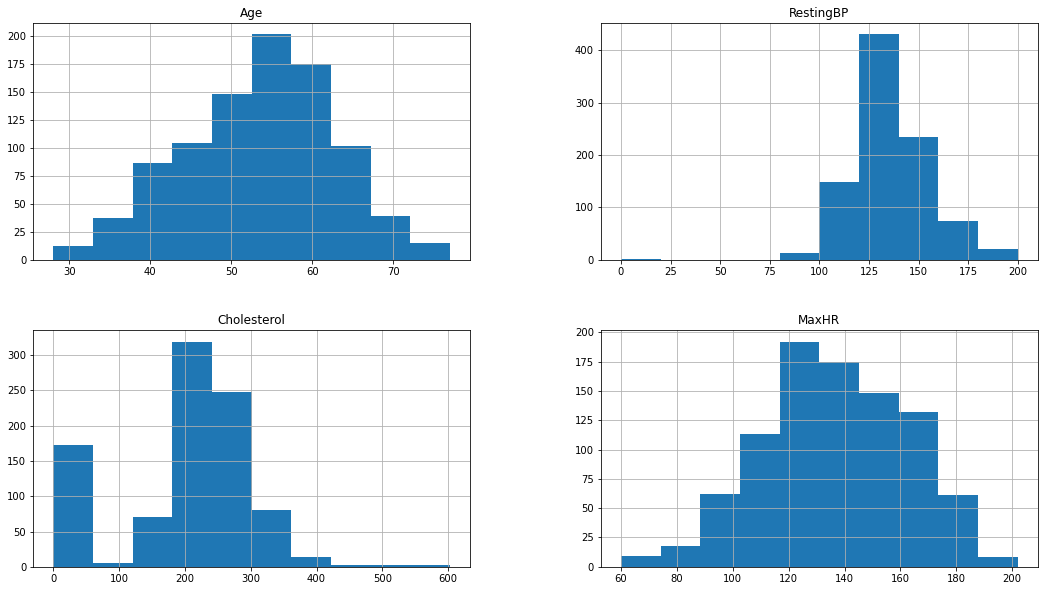

In [9]:
hist = df.hist(figsize=(18,10),column=['Age','RestingBP','Cholesterol','MaxHR'])

##### По графикам можно предположить, что все показатели, кроме уровня холестерина обладают нормальным распределением.

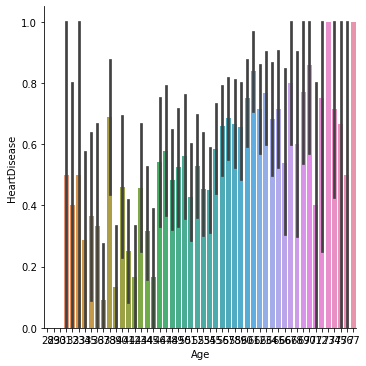

In [10]:
sns.catplot(x = 'Age', y = 'HeartDisease', kind = 'bar', data = df)

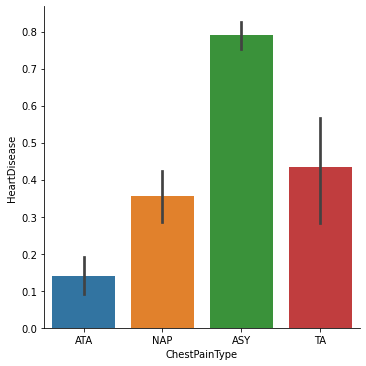

In [11]:
sns.catplot(x = 'ChestPainType', y = 'HeartDisease', kind = 'bar', data = df)

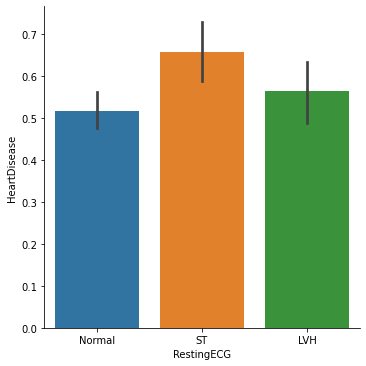

In [12]:
sns.catplot(x = 'RestingECG',y = 'HeartDisease', kind = 'bar', data = df)

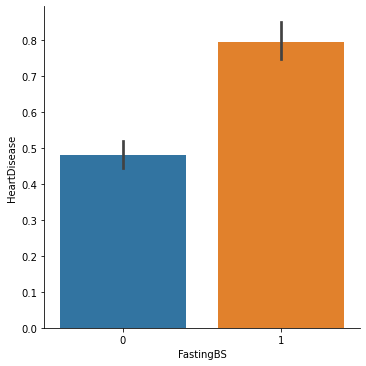

In [13]:
sns.catplot(x = 'FastingBS',y = 'HeartDisease',kind = 'bar',data=df)

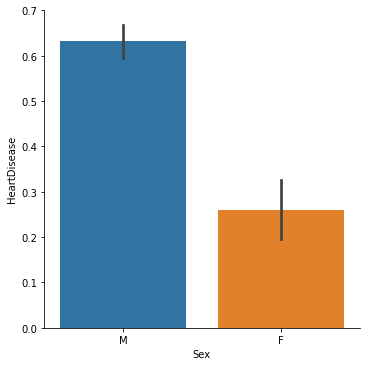

In [14]:
sns.catplot(x = 'Sex',y = 'HeartDisease',kind = 'bar',data=df)

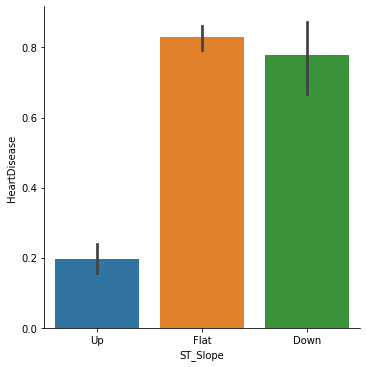

In [15]:
sns.catplot(x = 'ST_Slope',y = 'HeartDisease',kind = 'bar',data=df)

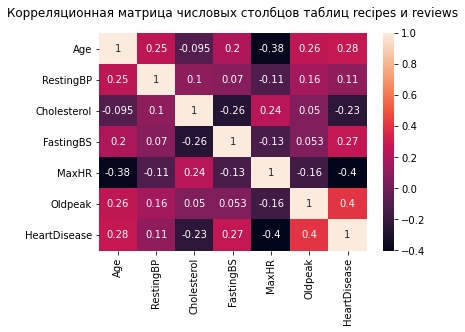

In [16]:
heat_map = sns.heatmap(df.corr(), annot = True)
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews", pad=16)
plt.show()

##### Выводы:
    - вероятность сердечной недостаточности у мужчин больше, чем у женщин
    
    - зависит от типа боли в груди (ChestPainType)
    
    - от уровня холестерина в крови(Cholestirin)
    
    - от уровня сахара(FastingBS)
    
    - от максимальной частоты сердечных сокращений (MaxHR)
    
    - результаты электрокардиограммы покоя (RestingECG)

#### Провести подготовительную обработку данных, включающую следующие шаги: 
    - удаление или заполнение отсутствующих значений
    
    - приведение всех признаков к бинарной либо числовой шкале 
    
    - удаление несущественных либо избыточных признаков
    
    - другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.)

In [17]:
df=df.drop(['ExerciseAngina','Oldpeak','Age','ST_Slope'],axis=1)
df

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,M,ATA,140,289,0,Normal,172,0
1,F,NAP,160,180,0,Normal,156,1
2,M,ATA,130,283,0,ST,98,0
3,F,ASY,138,214,0,Normal,108,1
4,M,NAP,150,195,0,Normal,122,0
...,...,...,...,...,...,...,...,...
913,M,TA,110,264,0,Normal,132,1
914,M,ASY,144,193,1,Normal,141,1
915,M,ASY,130,131,0,Normal,115,1
916,F,ATA,130,236,0,LVH,174,1


In [18]:
ChestPainType_=np.unique(df['ChestPainType'].values)
val=[i+1 for i in range(len(ChestPainType_))]
ChestPainType_1=dict(zip(ChestPainType_,val))
ChestPainType_1

{'ASY': 1, 'ATA': 2, 'NAP': 3, 'TA': 4}

In [19]:
restin=np.unique(df['RestingECG'].values)
val=[i+1 for i in range(len(restin))]
re_=dict(zip(restin,val))
re_

{'LVH': 1, 'Normal': 2, 'ST': 3}

In [20]:
sx=np.unique(df['Sex'].values)
val=[i+1 for i in range(len(sx))]
sx_=dict(zip(sx,val))
sx_

{'F': 1, 'M': 2}

In [21]:
pd.options.mode.chained_assignment = None
for i in range(len(df)):
    a=df['ChestPainType'][i]
    df['ChestPainType'][i] = ChestPainType_1[a]
    b=df['RestingECG'][i]
    df['RestingECG'][i]=re_[b]
    c=df['Sex'][i]
    df['Sex'][i]=sx_[c]

In [22]:
df

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,2,2,140,289,0,2,172,0
1,1,3,160,180,0,2,156,1
2,2,2,130,283,0,3,98,0
3,1,1,138,214,0,2,108,1
4,2,3,150,195,0,2,122,0
...,...,...,...,...,...,...,...,...
913,2,4,110,264,0,2,132,1
914,2,1,144,193,1,2,141,1
915,2,1,130,131,0,2,115,1
916,1,2,130,236,0,1,174,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sex            918 non-null    object
 1   ChestPainType  918 non-null    object
 2   RestingBP      918 non-null    int64 
 3   Cholesterol    918 non-null    int64 
 4   FastingBS      918 non-null    int64 
 5   RestingECG     918 non-null    object
 6   MaxHR          918 non-null    int64 
 7   HeartDisease   918 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 57.5+ KB


### Дополнительные задания
1) Использовать несколько моделей машинного обучения для решения поставленной задачи.

2) Использовать методику замеры времени обучения каждой использованной модели.

3) Сформировать сводную таблицу результатов обучения, включающую следующие данные:
    
    - время обучения модели;
    
    - accuracy;
    
    - precision;
    
    - recall;
    
    - f1-score.

In [24]:
Y = df['HeartDisease'].to_numpy()
X = df[['Sex', 'ChestPainType', 'RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR']].to_numpy()

In [25]:
report = pd.DataFrame(columns=['Модель','Time','accuracy','precision','recall','f1'])
report

,Модель,Time,accuracy,precision,recall,f1


In [26]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

### Гауссово ядро

In [28]:
svcgay = SVC(kernel='rbf')
svcgay.fit(x_train, y_train)
y_pred = svcgay.predict(x_test)

In [29]:
print(metrics.confusion_matrix(y_test,y_pred))
print('Метрика достоверности предсказания:', accuracy_score(y_test, y_pred))
print('Метрика точности:', precision_score(y_test, y_pred))
print('Метрика полноты:', recall_score(y_test, y_pred))
print('f1: ', f1_score(y_test,y_pred)) 
print(classification_report(y_test, y_pred))

[[55 22]
 [13 94]]
Метрика достоверности предсказания: 0.8097826086956522
Метрика точности: 0.8103448275862069
Метрика полноты: 0.8785046728971962
f1:  0.8430493273542601
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        77
           1       0.81      0.88      0.84       107

    accuracy                           0.81       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



In [30]:
%%time

svcgay.fit(x_train, y_train)

Wall time: 16 ms


SVC()

In [31]:
first = pd.DataFrame([['Метод опорных векторов с гауссовым ядром (SVC)','Wall time: 16 ms',accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)]],columns=['Модель','Time','accuracy','precision','recall','f1'])
report = pd.concat([report,first],ignore_index=True)
report

,Модель,Time,accuracy,precision,recall,f1
0,Метод опорных векторов с гауссовым ядром (SVC),Wall time: 16 ms,0.809783,0.810345,0.878505,0.843049


### Многослойный перцептрон

In [32]:
clmlp = MLPClassifier(random_state = 1, max_iter = 3000)
clmlp.fit(x_train, y_train)
y_pred = clmlp.predict(x_test)

In [33]:
print(metrics.confusion_matrix(y_test,y_pred))
print('Метрика достоверности предсказания:', accuracy_score(y_test, y_pred))
print('Метрика точности:', precision_score(y_test, y_pred))
print('Метрика полноты:', recall_score(y_test, y_pred))
print('f1: ', f1_score(y_test,y_pred)) 
print(classification_report(y_test, y_pred))

[[49 28]
 [18 89]]
Метрика достоверности предсказания: 0.75
Метрика точности: 0.7606837606837606
Метрика полноты: 0.8317757009345794
f1:  0.7946428571428571
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        77
           1       0.76      0.83      0.79       107

    accuracy                           0.75       184
   macro avg       0.75      0.73      0.74       184
weighted avg       0.75      0.75      0.75       184



In [34]:
%%time

clmlp.fit(x_train, y_train)

Wall time: 5.79 s


MLPClassifier(max_iter=3000, random_state=1)

In [35]:
second = pd.DataFrame([['Многослойный перцептрон (MLP)','Wall time: 5.79 s',accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)]],columns=['Модель','Time','accuracy','precision','recall','f1'])
report = pd.concat([report,second],ignore_index=True)
report

,Модель,Time,accuracy,precision,recall,f1
0,Метод опорных векторов с гауссовым ядром (SVC),Wall time: 16 ms,0.809783,0.810345,0.878505,0.843049
1,Многослойный перцептрон (MLP),Wall time: 5.79 s,0.750000,0.760684,0.831776,0.794643


### Метод k ближайших соседей

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [38]:
print(metrics.confusion_matrix(y_test,y_pred))
print('Метрика достоверности предсказания:', accuracy_score(y_test, y_pred))
print('Метрика точности:', precision_score(y_test, y_pred))
print('Метрика полноты:', recall_score(y_test, y_pred))
print('f1: ', f1_score(y_test,y_pred)) 
print(classification_report(y_test, y_pred))

[[52 25]
 [25 82]]
Метрика достоверности предсказания: 0.7282608695652174
Метрика точности: 0.7663551401869159
Метрика полноты: 0.7663551401869159
f1:  0.766355140186916
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        77
           1       0.77      0.77      0.77       107

    accuracy                           0.73       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.73      0.73      0.73       184



In [39]:
%%time

classifier.fit(x_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(n_neighbors=3)

In [40]:
third = pd.DataFrame([['Метод k ближайших соседей (KNeighborsClassifier)','Wall time: 1 ms',accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)]],columns=['Модель','Time','accuracy','precision','recall','f1'])
report = pd.concat([report,third],ignore_index=True)
report

,Модель,Time,accuracy,precision,recall,f1
0,Метод опорных векторов с гауссовым ядром (SVC),Wall time: 16 ms,0.809783,0.810345,0.878505,0.843049
1,Многослойный перцептрон (MLP),Wall time: 5.79 s,0.750000,0.760684,0.831776,0.794643
2,Метод k ближайших соседей (KNeighborsClassifier),Wall time: 1 ms,0.728261,0.766355,0.766355,0.766355
